#IMPORTING LIBRARY FUNCTION

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression




In [2]:
# Load the uploaded dataset
file_path = '/content/updated_pollution_dataset.csv'
data = pd.read_csv(file_path)

In [3]:
# Display the first few rows to understand its structure
data.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [4]:
# Display the first few rows to understand its structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


#DATA CLEANING

In [5]:
# Check for missing values in each column
missing_values = data.isnull().sum()

# Print the results
print(missing_values)

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64


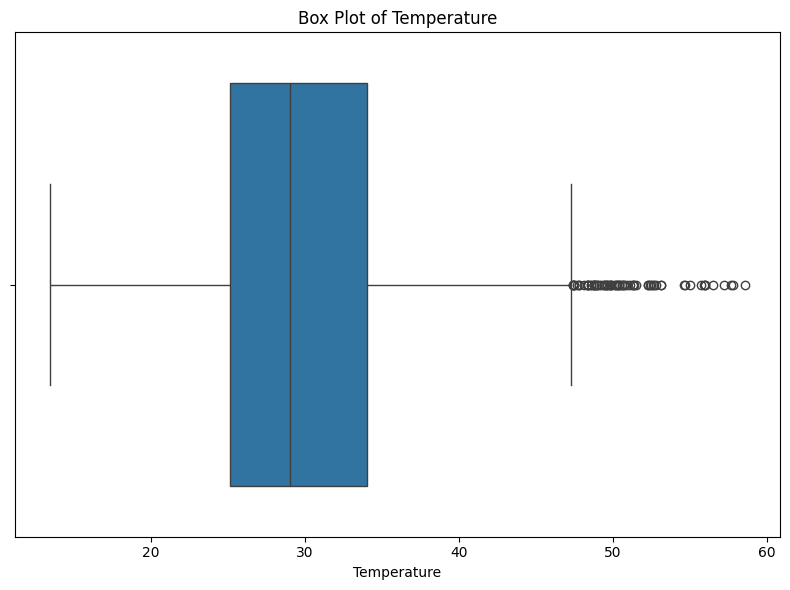

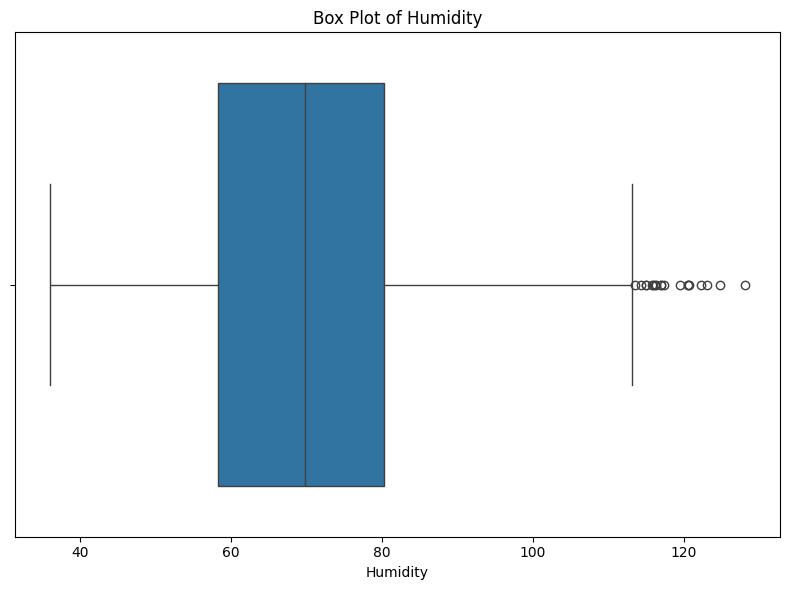

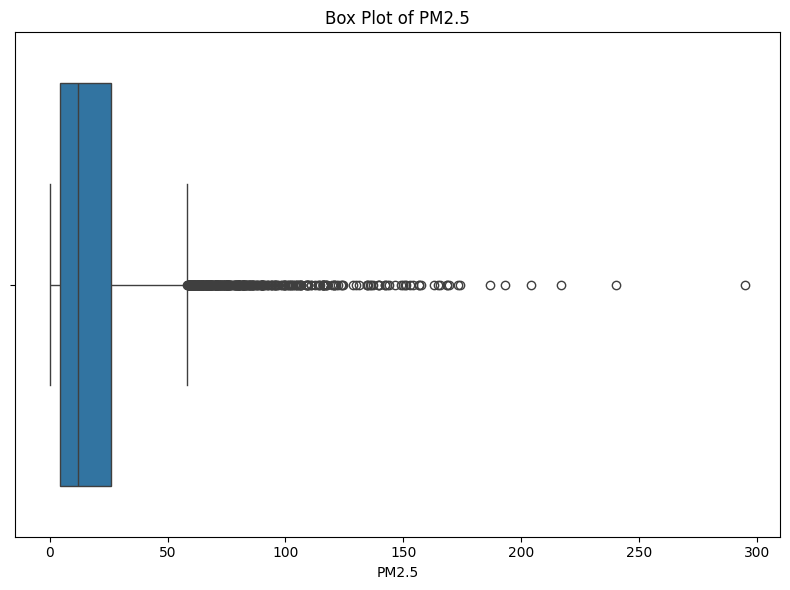

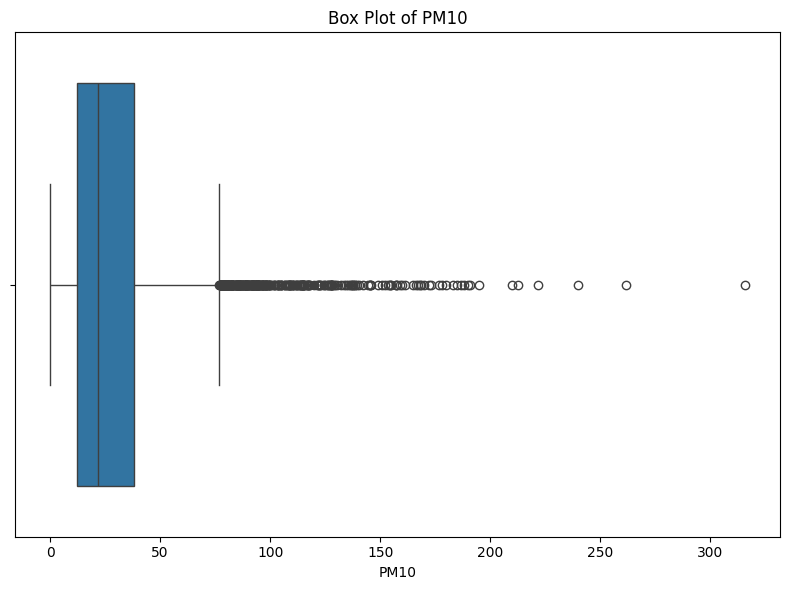

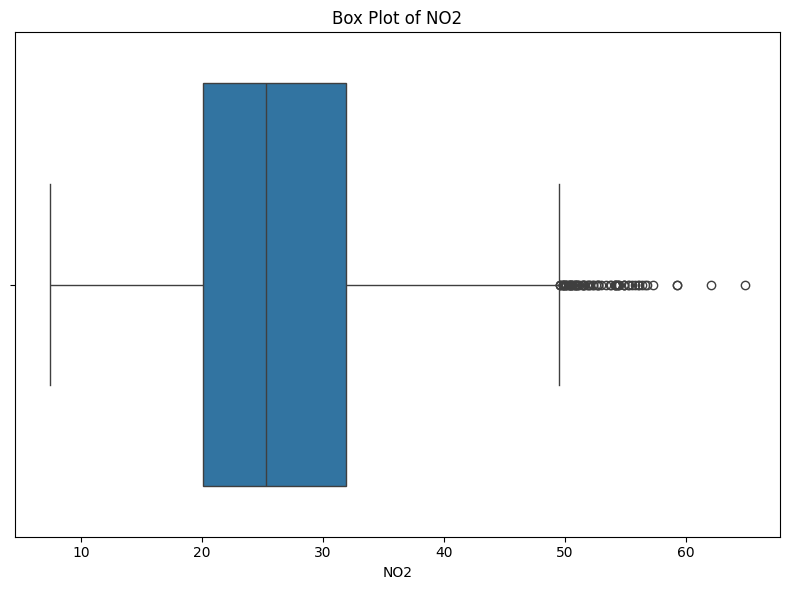

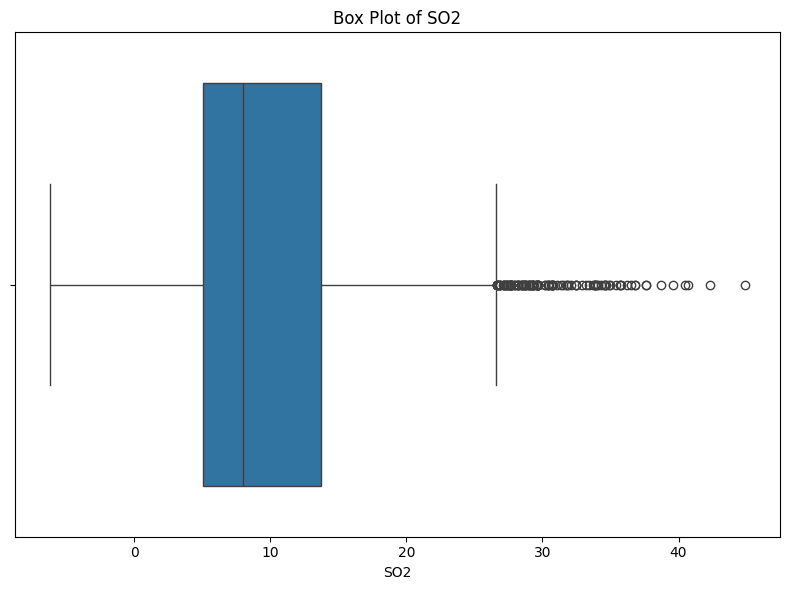

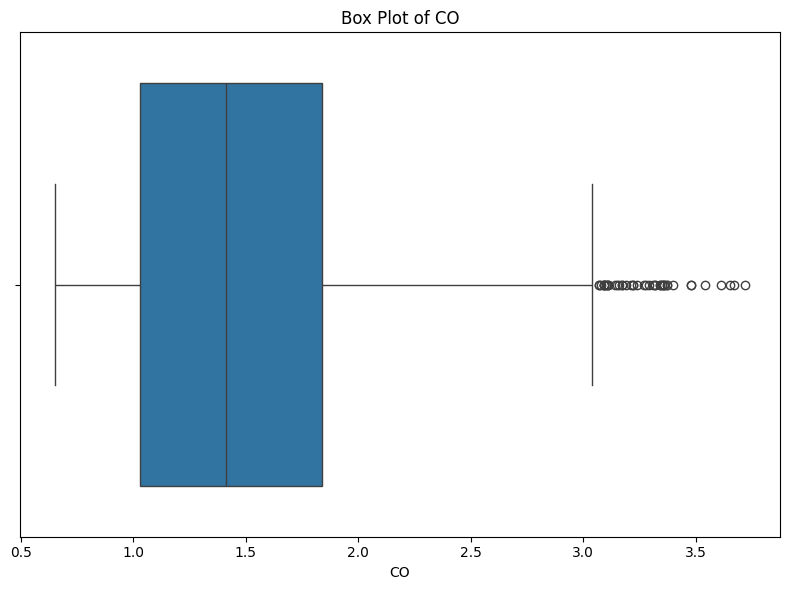

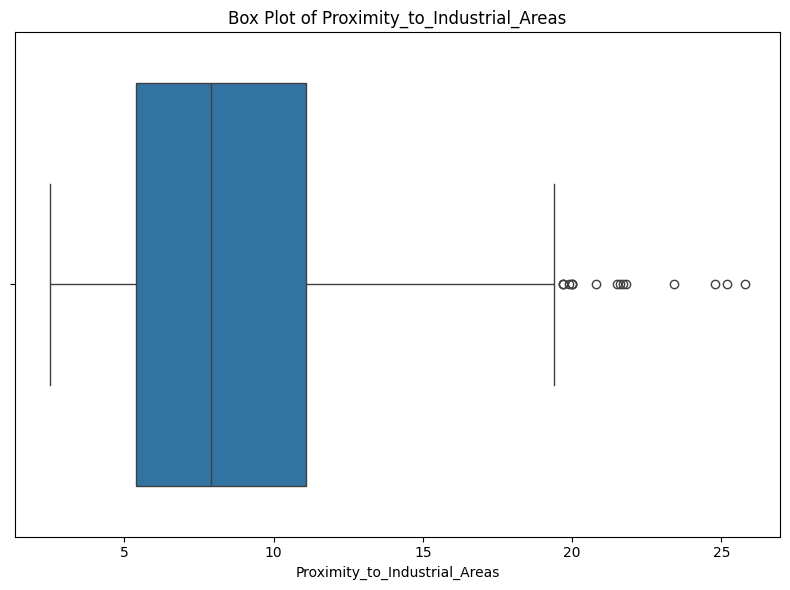

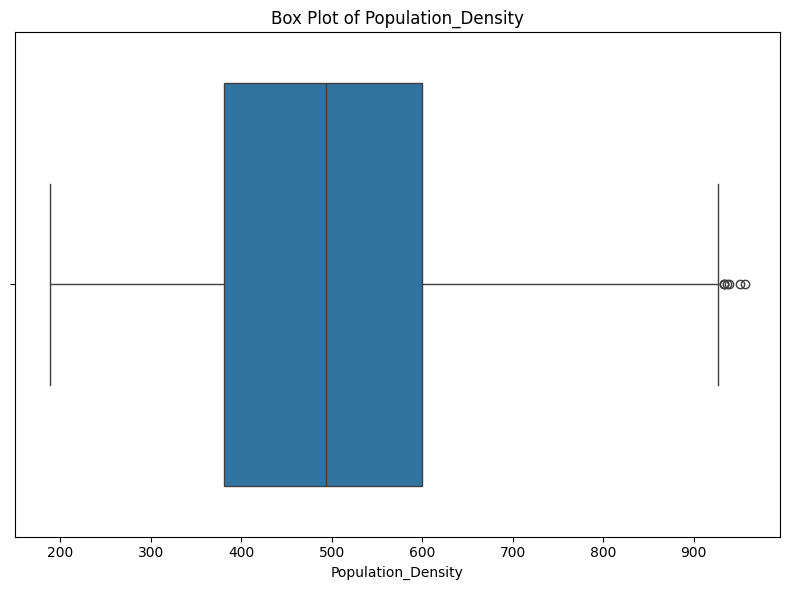

In [6]:
# Select numerical features for box plots
numerical_features = data.select_dtypes(include=['number'])

# Create box plots for each numerical feature
for column in numerical_features.columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.tight_layout()  # Adjust layout for better visibility
    plt.show()

In [7]:
def remove_outliers_iqr(data, column):
    """Removes outliers from a pandas DataFrame column using the IQR method.

    Args:
        data: pandas DataFrame.
        column: Name of the column to remove outliers from.

    Returns:
        pandas DataFrame with outliers removed.
    """

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data_filtered = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_filtered

# Apply the function to your numerical features
for column in numerical_features.columns:
  data = remove_outliers_iqr(data, column) #Updates the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4158 entries, 0 to 4998
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    4158 non-null   float64
 1   Humidity                       4158 non-null   float64
 2   PM2.5                          4158 non-null   float64
 3   PM10                           4158 non-null   float64
 4   NO2                            4158 non-null   float64
 5   SO2                            4158 non-null   float64
 6   CO                             4158 non-null   float64
 7   Proximity_to_Industrial_Areas  4158 non-null   float64
 8   Population_Density             4158 non-null   int64  
 9   Air Quality                    4158 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 357.3+ KB


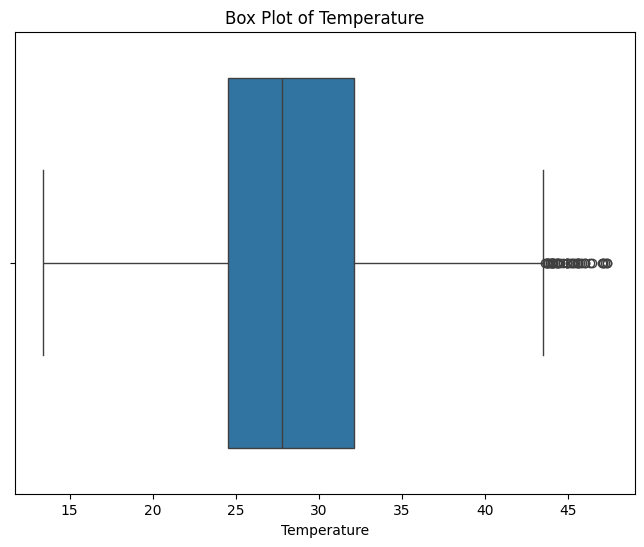

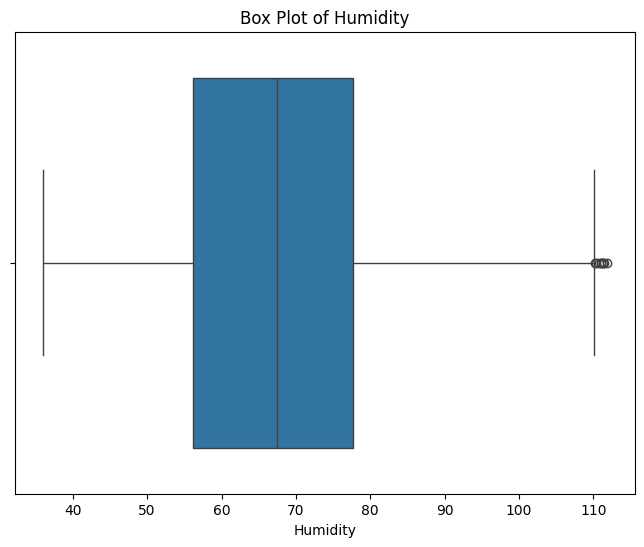

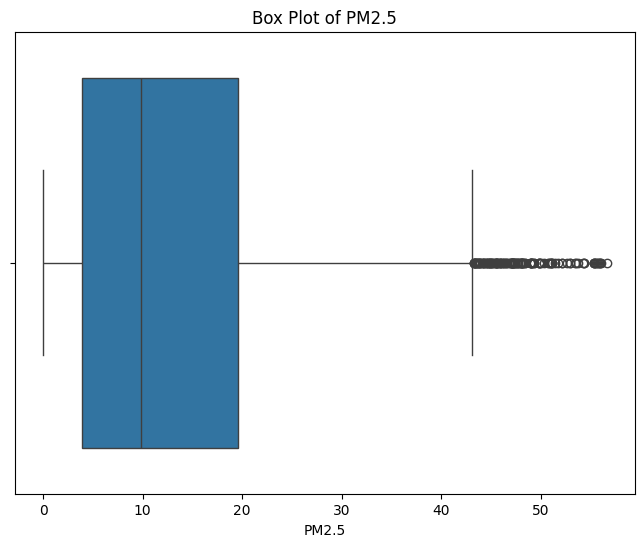

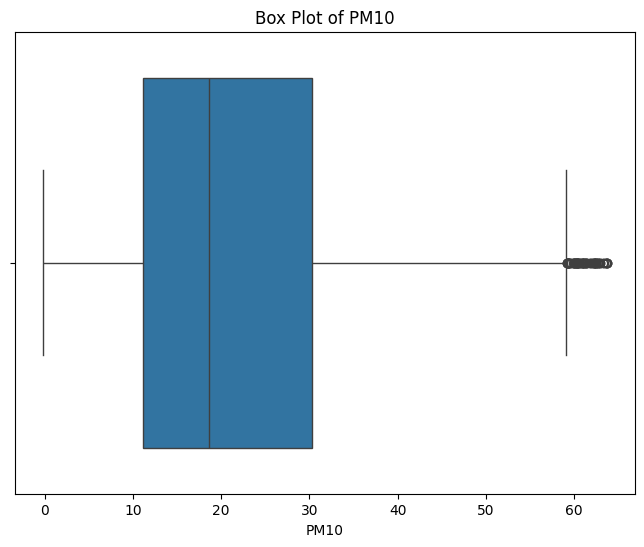

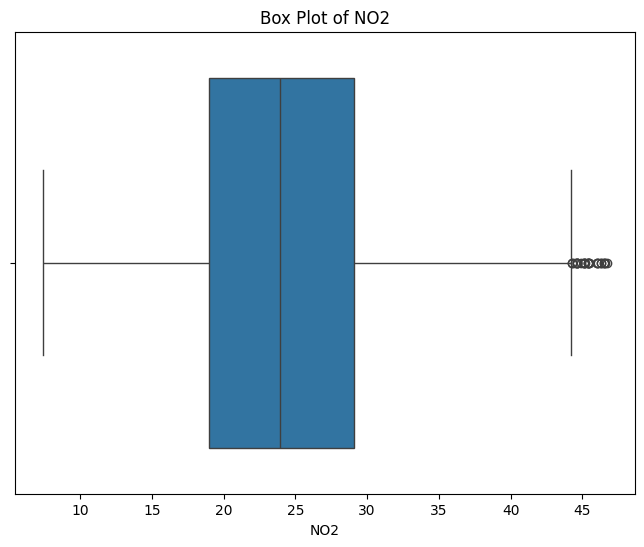

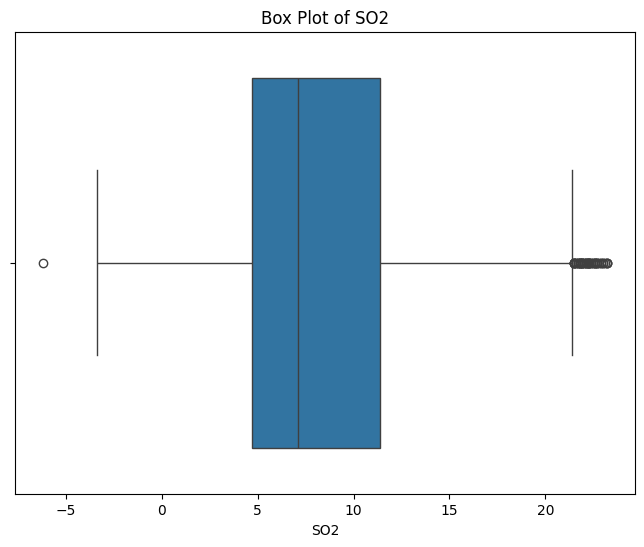

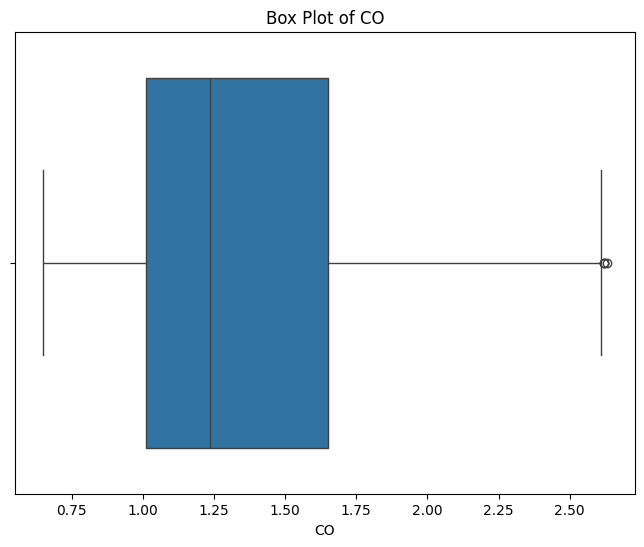

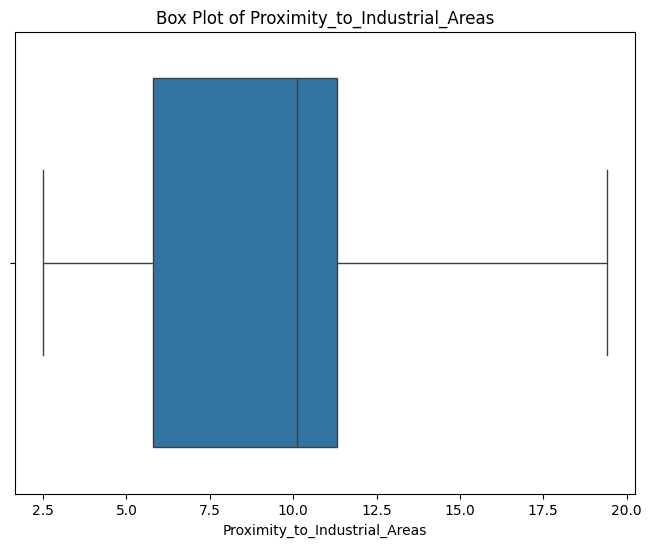

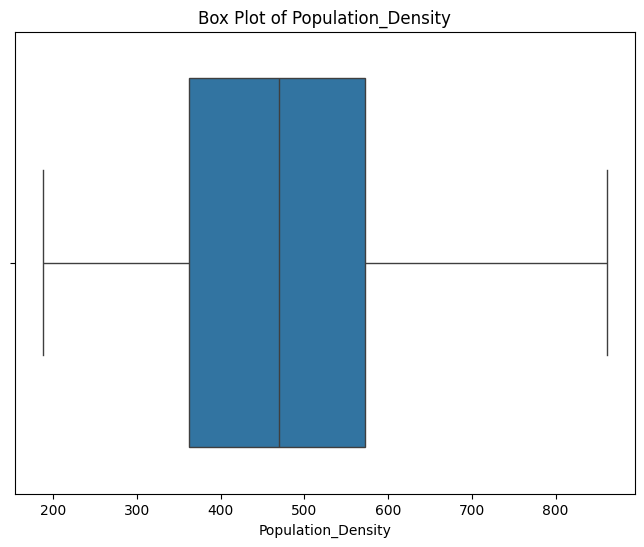

In [8]:
# Select numerical features for box plots
numerical_features = data.select_dtypes(include=['number'])

# Create box plots for each numerical feature
for column in numerical_features.columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

#DATA VISUALIZATION

#LABEL ENCODING( ORDINAL ENCODING)

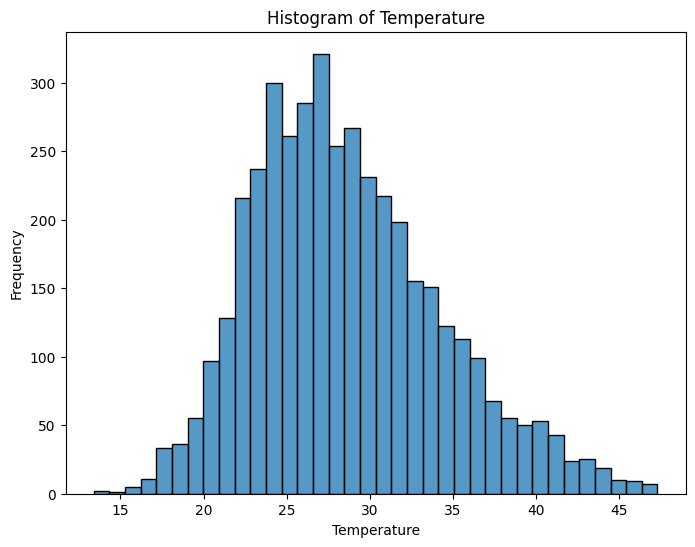

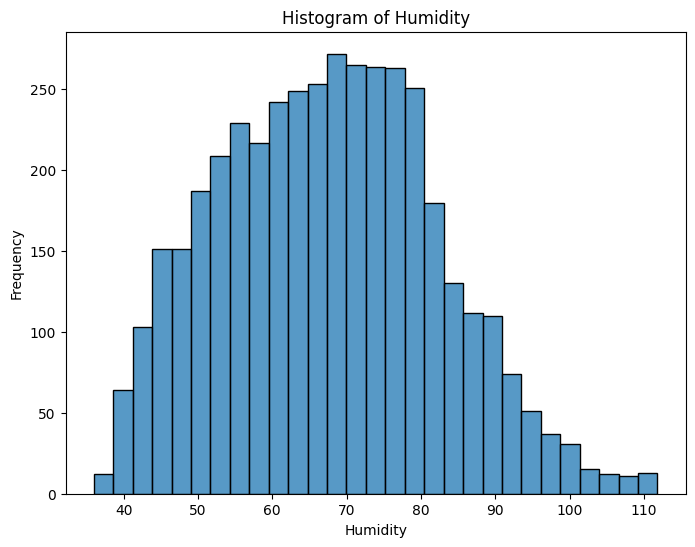

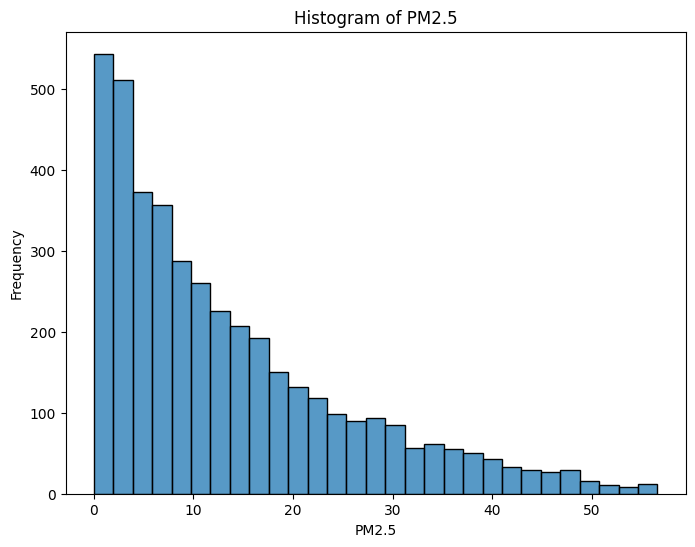

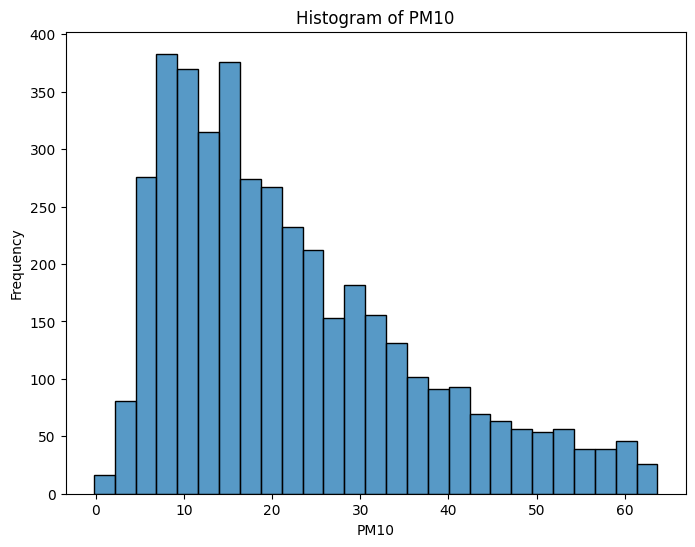

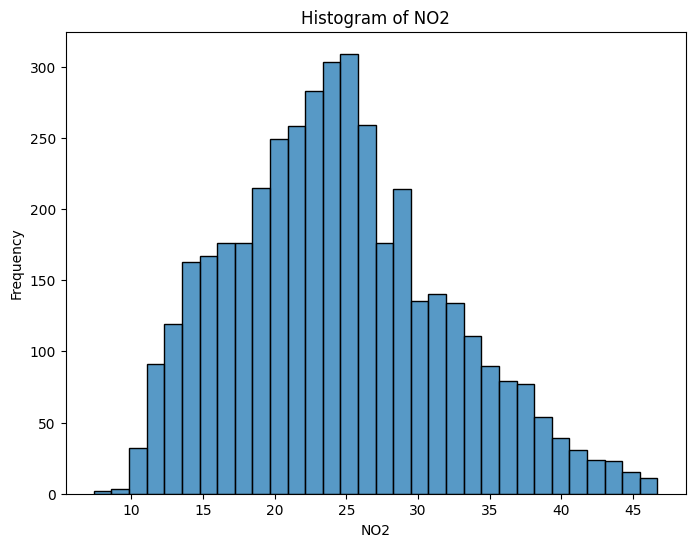

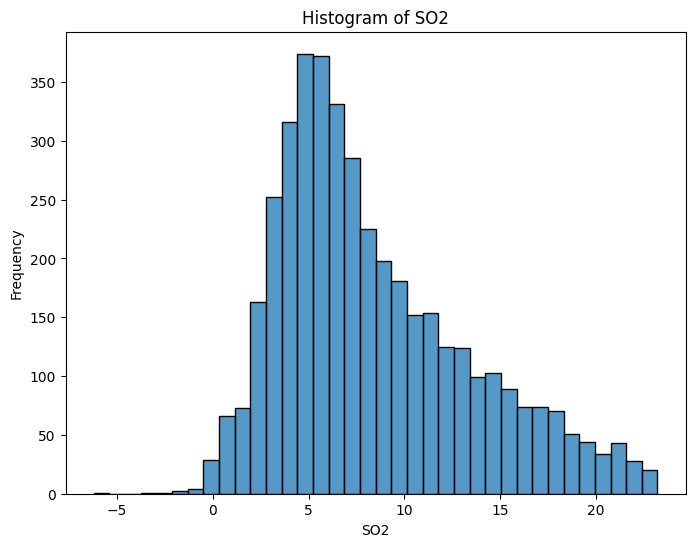

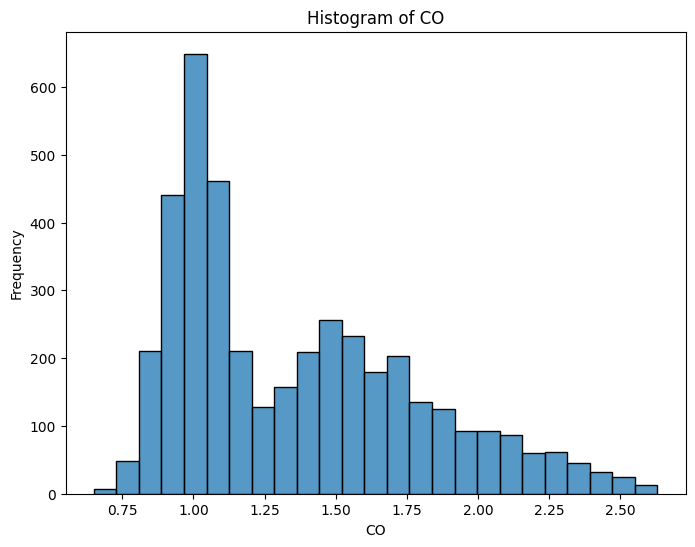

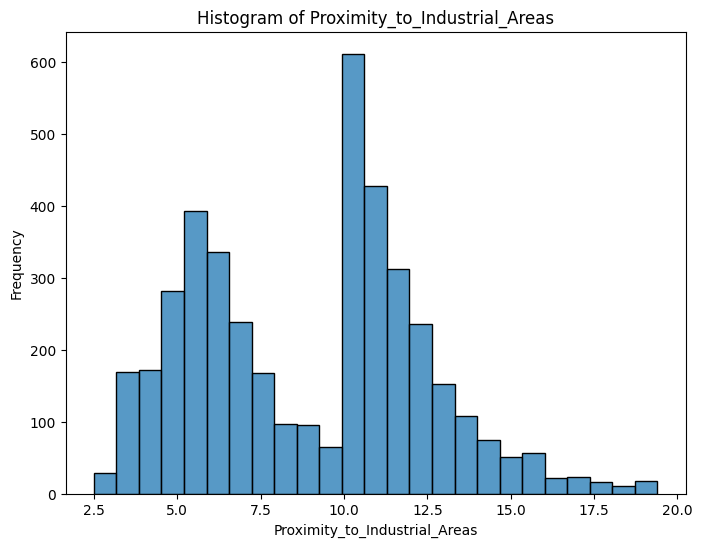

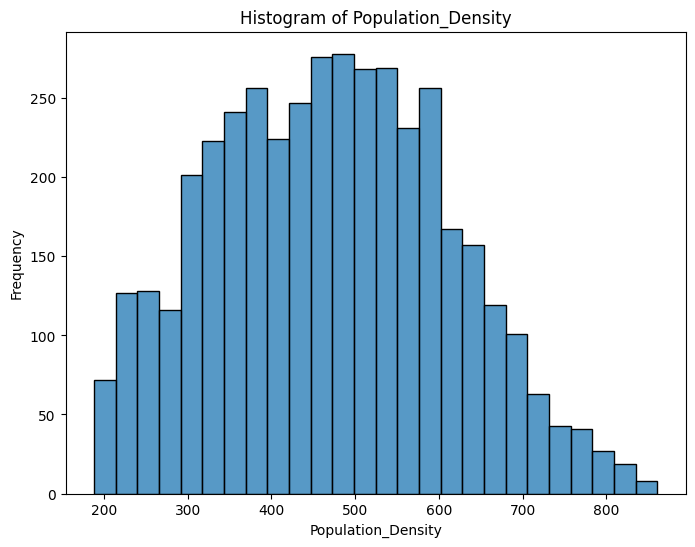

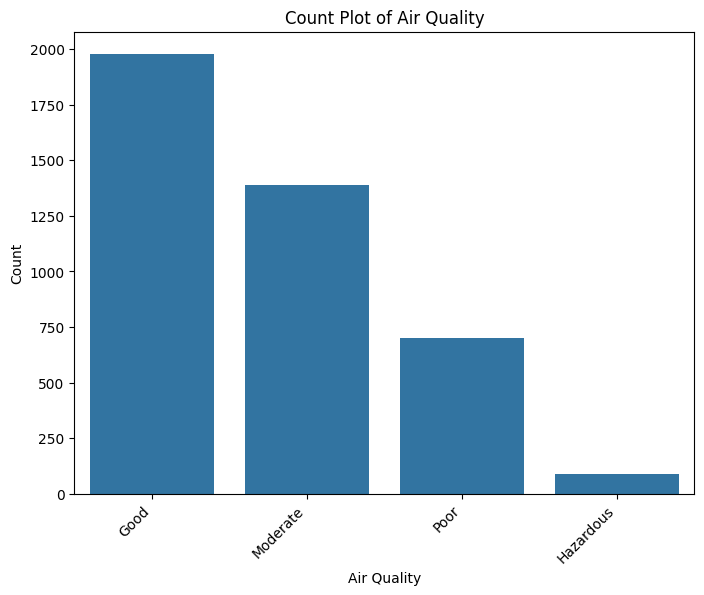

In [9]:
numerical_features = data.select_dtypes(include=['number'])
for column in numerical_features.columns:
       plt.figure(figsize=(8, 6))  # Adjust figure size as needed
       sns.histplot(data[column])
       plt.title(f'Histogram of {column}')
       plt.xlabel(column)
       plt.ylabel('Frequency')
       plt.show()
categorical_features = data.select_dtypes(include=['object'])
for column in categorical_features.columns:
       plt.figure(figsize=(8, 6))  # Adjust figure size as needed
       sns.countplot(x=data[column], order=data[column].value_counts().index)
       plt.title(f'Count Plot of {column}')
       plt.xlabel(column)
       plt.ylabel('Count')
       plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
       plt.show()

In [10]:
# Assuming your DataFrame is named 'data'
unique_air_quality = data['Air Quality'].unique()

# Print the unique values
print(unique_air_quality)

['Moderate' 'Good' 'Hazardous' 'Poor']


In [11]:
# Assuming your DataFrame is named 'data'
air_quality_mapping = {
    'Good': 0,
    'Moderate': 1,
    'Poor': 2,
    'Hazardous': 3
}

data['Air Quality Encoded'] = data['Air Quality'].map(air_quality_mapping)

In [12]:
# Assuming your DataFrame is named 'data'
data = data.drop('Air Quality', axis=1)

In [13]:
data.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality Encoded
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,1
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,1
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,1
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,0


#CORRELATION MATRIX

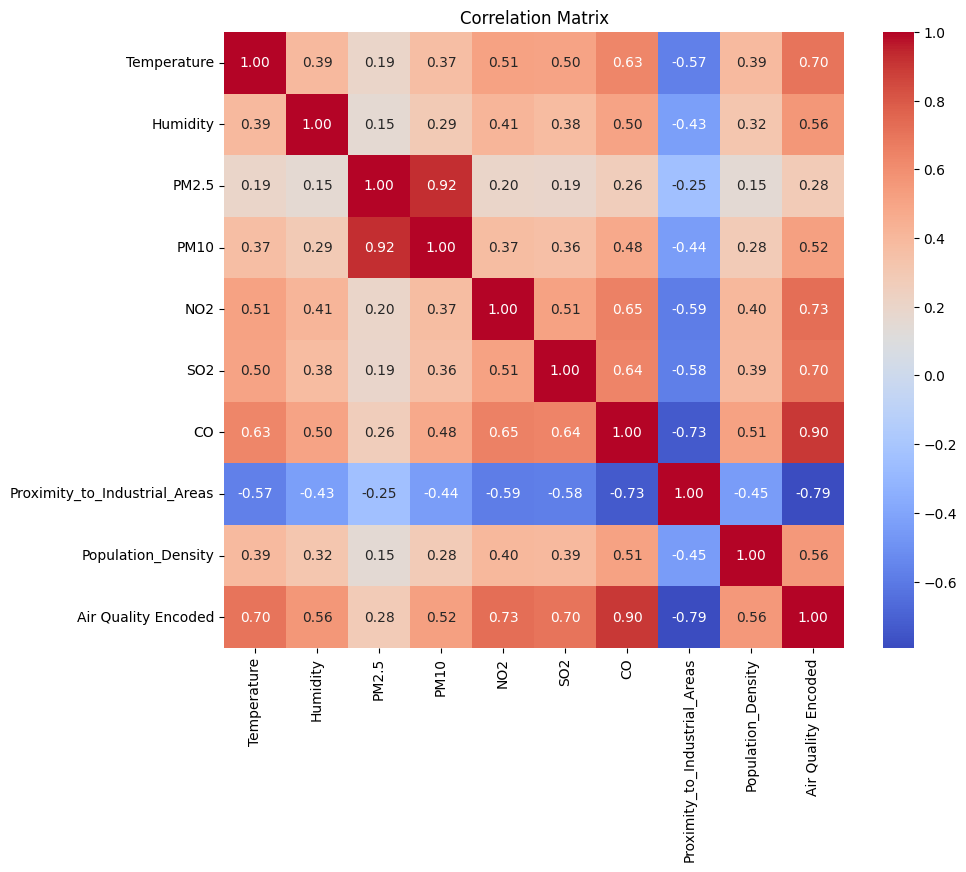

In [14]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [15]:
data.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality Encoded
count,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000
mean,28.624291,67.458923,13.477321,22.153054,24.444877,8.417629,1.358680,9.002646,469.990620,0.734969
std,5.638813,14.604439,12.096149,14.047948,7.418979,5.023425,0.423952,3.419490,139.874008,0.812451
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000,0.000000
25%,24.500000,56.100000,3.900000,11.100000,19.000000,4.700000,1.010000,5.800000,362.000000,0.000000
50%,27.800000,67.500000,9.800000,18.600000,23.900000,7.100000,1.235000,10.100000,470.000000,1.000000
75%,32.100000,77.700000,19.600000,30.300000,29.100000,11.400000,1.650000,11.300000,573.000000,1.000000
max,47.300000,111.800000,56.600000,63.700000,46.700000,23.200000,2.630000,19.400000,861.000000,3.000000


#MACHINE LEARNING MODEL TRAIN

# DECISION TREE

Accuracy: 0.9290865384615384
Precision: 0.9270849100958672
Recall: 0.9290865384615384
F1-score: 0.9277385663912372
Confusion Matrix:
[[389   2   0   0]
 [  1 270  15   0]
 [  0  25 104   6]
 [  0   0  10  10]]


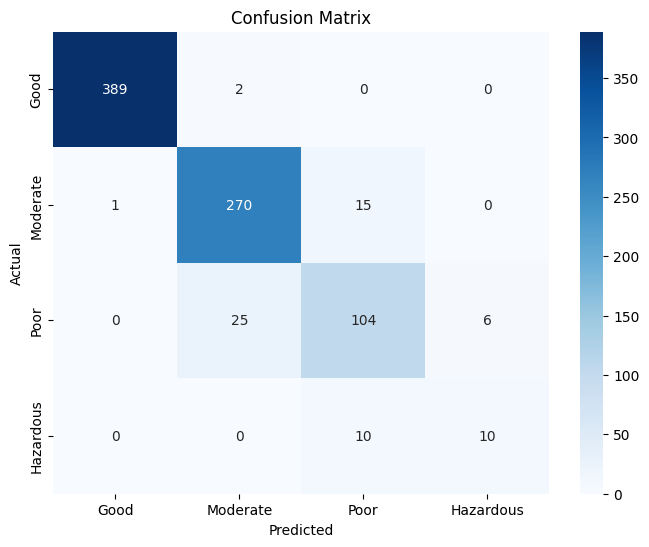

In [16]:
# Step 4: Split features and target
# Step 4: Split features and target
# X = data.drop(columns=['Air Quality'])  # Input features - This column has been dropped
X = data.drop(columns=['Air Quality Encoded'])  # Use the encoded target column for features
y = data['Air Quality Encoded']                 # Target column should be the encoded one

# Step 5: Scale features (optional but good practice)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 7: Train Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 8: Predict and evaluate
y_pred = model.predict(X_test)
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # For multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")



#accuracy = accuracy_score(y_test, y_pred)
#print(f"Accuracy: {accuracy * 100:.2f}%\n")

# The target_names for the classification report should correspond to the unique values in the original 'Air Quality' column
# Since 'Air Quality' was dropped, we need to get the class names from the original mapping or unique values before dropping.
# We can use the air_quality_mapping defined earlier to get the class names in the correct order.
# The order of class_names should match the encoded values (0, 1, 2, 3)
# Assuming the keys in air_quality_mapping are ordered according to their encoded values
class_names = list(air_quality_mapping.keys())


#print("Classification Report:")
# The target_names should be ordered to match the encoded labels (0, 1, 2, 3)
# Ensure the order of air_quality_mapping keys matches the intended order for the classification report
# based on the encoded values 0, 1, 2, 3.
# The air_quality_mapping is {'Good': 0, 'Moderate': 1, 'Poor': 2, 'Hazardous': 3}
# So the correct order for target_names is ['Good', 'Moderate', 'Poor', 'Hazardous']
ordered_class_names = [k for k, v in sorted(air_quality_mapping.items(), key=lambda item: item[1])] # Uncomment this line
#print(classification_report(y_test, y_pred, target_names=ordered_class_names))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=ordered_class_names, yticklabels=ordered_class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## SVM MODEL WITH KERNEL ="LINEAR"

In [17]:
# Assuming your DataFrame is named 'data' and the target column is 'Air Quality Encoded'
X = data.drop('Air Quality Encoded', axis=1)  # Features (all columns except the target)
y = data['Air Quality Encoded']  # Target variable

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.9507211538461539
Precision: 0.9488296670426817
Recall: 0.9507211538461539
F1-score: 0.9492644747375267
Confusion Matrix:
[[390   1   0   0]
 [  2 276   8   0]
 [  0  16 115   4]
 [  0   0  10  10]]


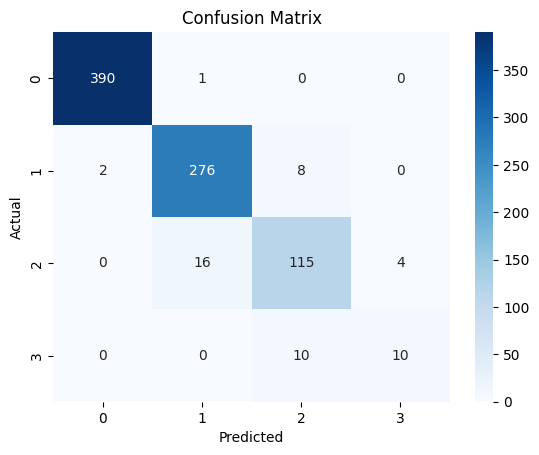

In [18]:
# Create and train the SVM classifier (using a linear kernel as an example)
svm_classifier = SVC(kernel='linear')  # You can change the kernel if needed
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # For multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Optionally, visualize the confusion matrix using seaborn


sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

##SVM MODEL WITH KERNEL = "RBF"

Accuracy (RBF): 0.7884615384615384
Precision (RBF): 0.7655613622600552
Recall (RBF): 0.7884615384615384
F1-score (RBF): 0.7694256792327538
Confusion Matrix (RBF):
[[371  20   0   0]
 [ 51 228   7   0]
 [  0  78  57   0]
 [  0   3  17   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


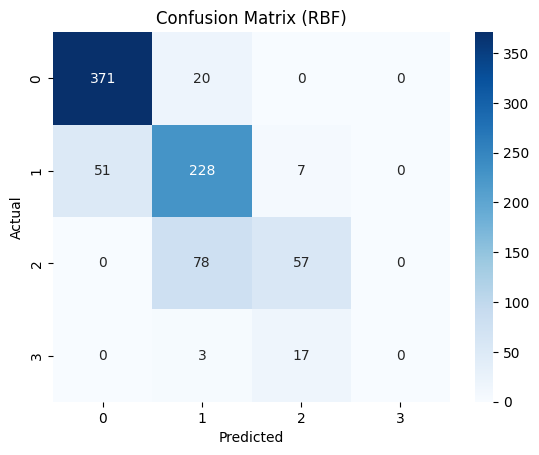

In [19]:
# Create and train the SVM classifier with RBF kernel
svm_classifier_rbf = SVC(kernel='rbf')  # Using RBF kernel
svm_classifier_rbf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rbf = svm_classifier_rbf.predict(X_test)

# Calculate evaluation metrics
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
precision_rbf = precision_score(y_test, y_pred_rbf, average='weighted')
recall_rbf = recall_score(y_test, y_pred_rbf, average='weighted')
f1_rbf = f1_score(y_test, y_pred_rbf, average='weighted')

# Print the metrics
print(f"Accuracy (RBF): {accuracy_rbf}")
print(f"Precision (RBF): {precision_rbf}")
print(f"Recall (RBF): {recall_rbf}")
print(f"F1-score (RBF): {f1_rbf}")

# Generate and display the confusion matrix
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
print("Confusion Matrix (RBF):")
print(cm_rbf)

# Visualize the confusion matrix using seaborn
sns.heatmap(cm_rbf, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (RBF)")
plt.show()

##LOGISTIC REGRESSION WITH L1 REGULARIZATION

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy (Logistic Regression with L1): 0.921875
Precision (Logistic Regression with L1): 0.8987820386123282
Recall (Logistic Regression with L1): 0.921875
F1-score (Logistic Regression with L1): 0.9098621411656744
Confusion Matrix (Logistic Regression with L1):
[[391   0   0   0]
 [  8 273   5   0]
 [  0  32 103   0]
 [  0   0  20   0]]


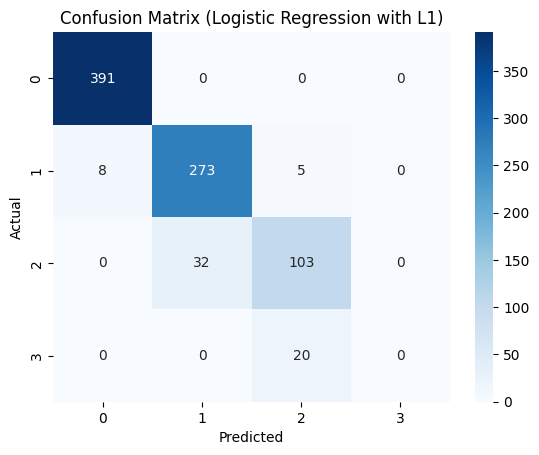

In [20]:
# Create and train Logistic Regression with L1 regularization
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear')  # Use liblinear for L1
logreg_l1.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg_l1 = logreg_l1.predict(X_test)

# Calculate evaluation metrics
accuracy_logreg_l1 = accuracy_score(y_test, y_pred_logreg_l1)
precision_logreg_l1 = precision_score(y_test, y_pred_logreg_l1, average='weighted')
recall_logreg_l1 = recall_score(y_test, y_pred_logreg_l1, average='weighted')
f1_logreg_l1 = f1_score(y_test, y_pred_logreg_l1, average='weighted')

# Print the metrics
print(f"Accuracy (Logistic Regression with L1): {accuracy_logreg_l1}")
print(f"Precision (Logistic Regression with L1): {precision_logreg_l1}")
print(f"Recall (Logistic Regression with L1): {recall_logreg_l1}")
print(f"F1-score (Logistic Regression with L1): {f1_logreg_l1}")

# Generate and display the confusion matrix
cm_logreg_l1 = confusion_matrix(y_test, y_pred_logreg_l1)
print("Confusion Matrix (Logistic Regression with L1):")
print(cm_logreg_l1)

# Visualize the confusion matrix using seaborn
sns.heatmap(cm_logreg_l1, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Logistic Regression with L1)")
plt.show()

##LOGISTIC REGRESSION WITH L2 REGULARIZATION

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy (Logistic Regression with L2): 0.8665865384615384
Precision (Logistic Regression with L2): 0.8423818234642917
Recall (Logistic Regression with L2): 0.8665865384615384
F1-score (Logistic Regression with L2): 0.8536117115071055
Confusion Matrix (Logistic Regression with L2):
[[388   3   0   0]
 [ 16 250  20   0]
 [  1  51  83   0]
 [  0   3  17   0]]


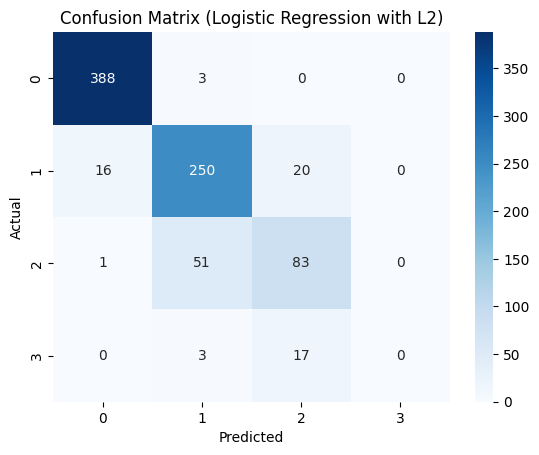

In [21]:
# Create and train Logistic Regression with L2 regularization
logreg_l2 = LogisticRegression(penalty='l2')  # Default penalty is L2
logreg_l2.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg_l2 = logreg_l2.predict(X_test)

# Calculate evaluation metrics
accuracy_logreg_l2 = accuracy_score(y_test, y_pred_logreg_l2)
precision_logreg_l2 = precision_score(y_test, y_pred_logreg_l2, average='weighted')
recall_logreg_l2 = recall_score(y_test, y_pred_logreg_l2, average='weighted')
f1_logreg_l2 = f1_score(y_test, y_pred_logreg_l2, average='weighted')

# Print the metrics
print(f"Accuracy (Logistic Regression with L2): {accuracy_logreg_l2}")
print(f"Precision (Logistic Regression with L2): {precision_logreg_l2}")
print(f"Recall (Logistic Regression with L2): {recall_logreg_l2}")
print(f"F1-score (Logistic Regression with L2): {f1_logreg_l2}")

# Generate and display the confusion matrix
cm_logreg_l2 = confusion_matrix(y_test, y_pred_logreg_l2)
print("Confusion Matrix (Logistic Regression with L2):")
print(cm_logreg_l2)

# Visualize the confusion matrix using seaborn
sns.heatmap(cm_logreg_l2, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Logistic Regression with L2)")
plt.show()

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4158 entries, 0 to 4998
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    4158 non-null   float64
 1   Humidity                       4158 non-null   float64
 2   PM2.5                          4158 non-null   float64
 3   PM10                           4158 non-null   float64
 4   NO2                            4158 non-null   float64
 5   SO2                            4158 non-null   float64
 6   CO                             4158 non-null   float64
 7   Proximity_to_Industrial_Areas  4158 non-null   float64
 8   Population_Density             4158 non-null   int64  
 9   Air Quality Encoded            4158 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 357.3 KB
